In [2]:
# Importing essential libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/admission_prediction/admission_predict.csv')

Exploring the dataset

In [5]:
df.shape


(500, 9)

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [8]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [10]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [11]:
df.isnull().any()

,0
Serial No.,False
GRE Score,False
TOEFL Score,False
University Rating,False
SOP,False
LOR,False
CGPA,False
Research,False
Chance of Admit,False


In [12]:
df = df.rename(columns={'GRE Score': 'GRE', 'TOEFL Score': 'TOEFL', 'LOR ': 'LOR', 'Chance of Admit ': 'Probability'})
df.head()

,Serial No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Data Visualization


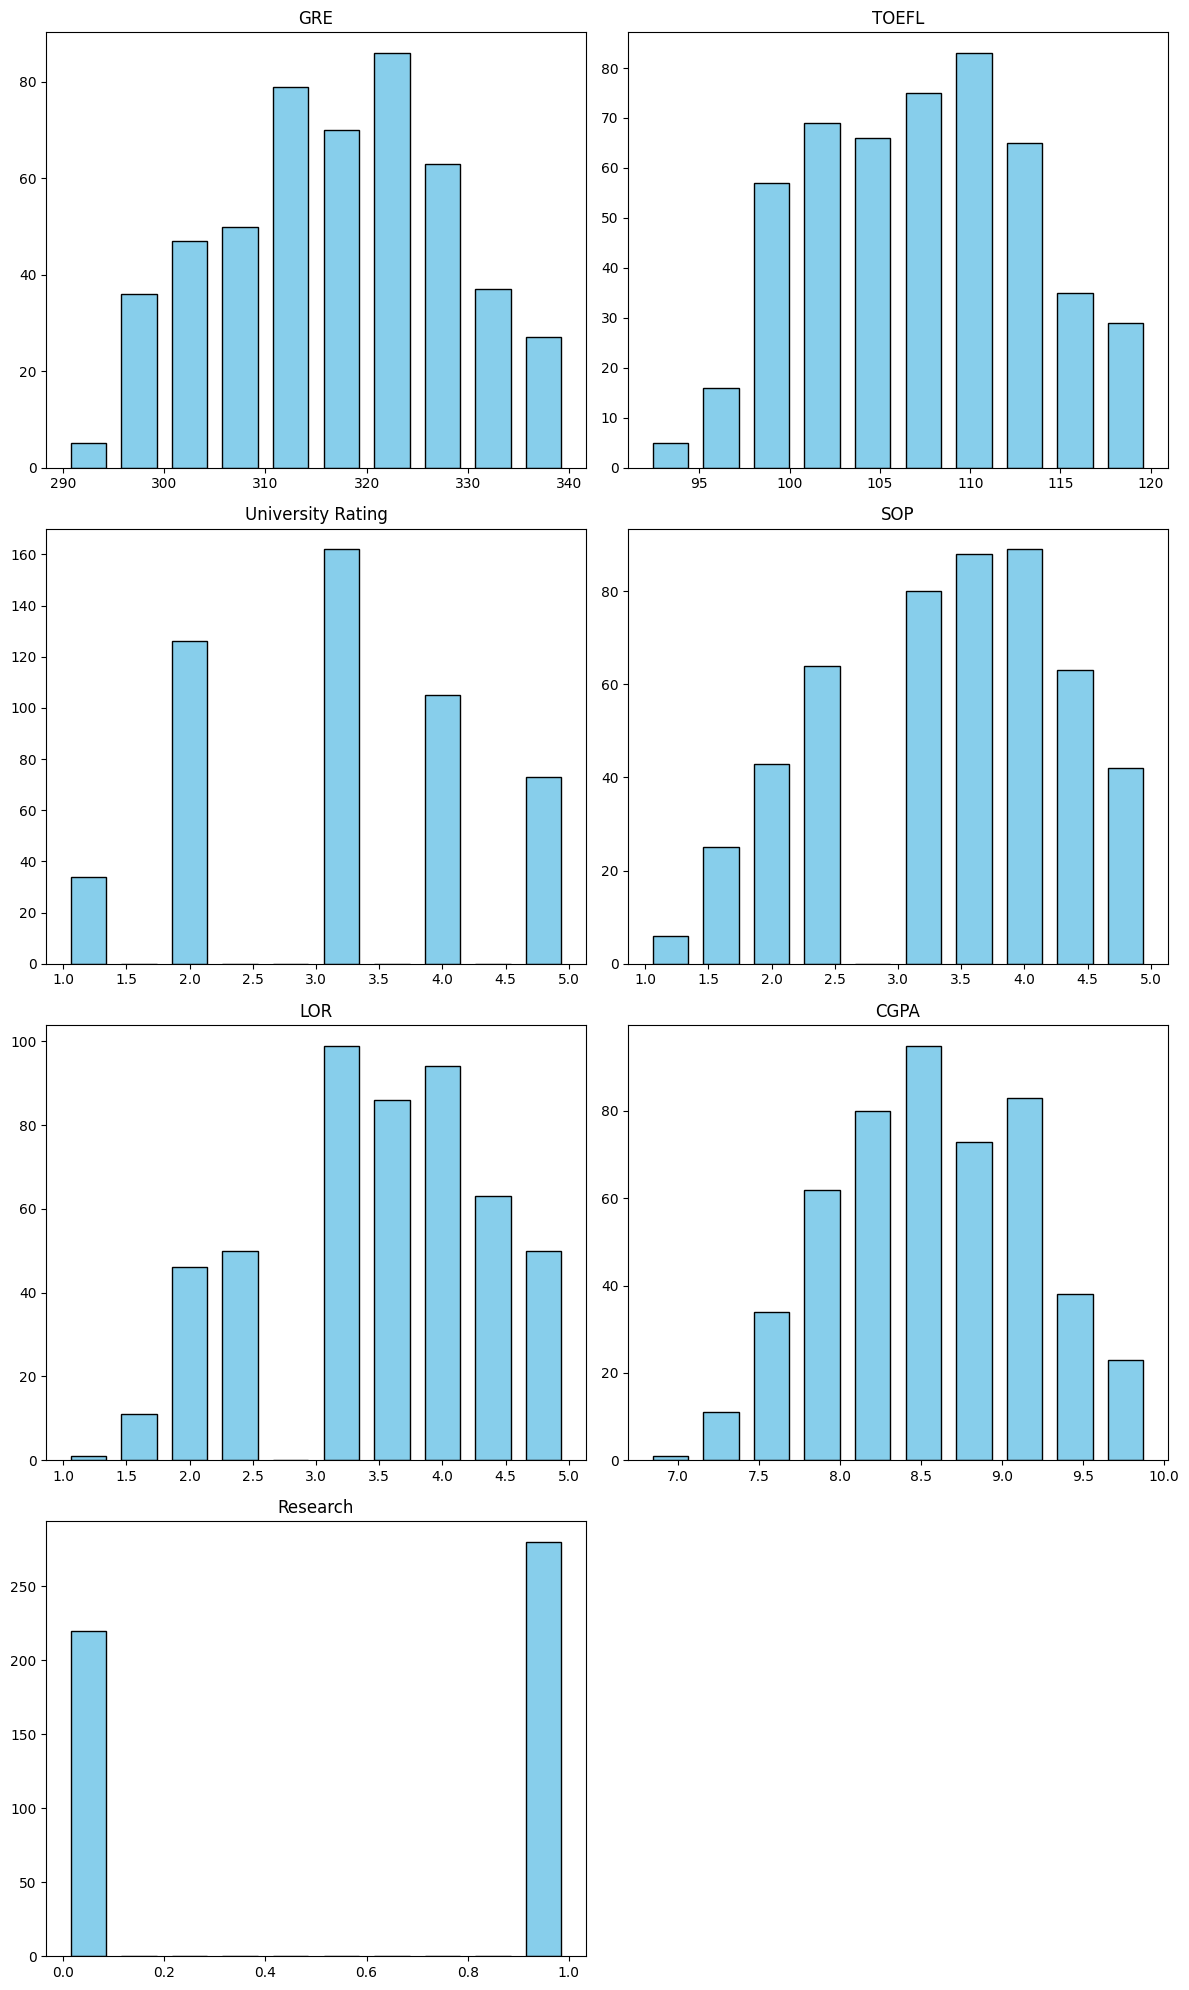

In [13]:
# Creating 4x2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 20))
axes = axes.flatten()

# Plot histograms for each feature
for i, column in enumerate(df.columns[1:8]):
    axes[i].hist(df[column], rwidth=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(column)

# Turn off remaining unused subplots
axes[7].axis('off')

plt.tight_layout()
plt.show()


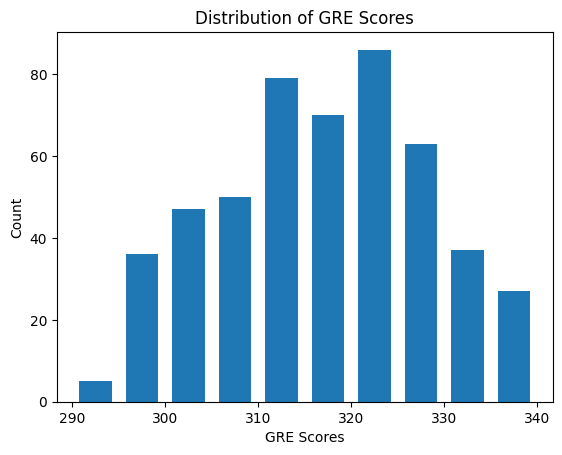

In [14]:
# Visualizing the feature GRE
fig = plt.hist(df['GRE'], rwidth=0.7)
plt.title("Distribution of GRE Scores")
plt.xlabel('GRE Scores')
plt.ylabel('Count')
plt.show()

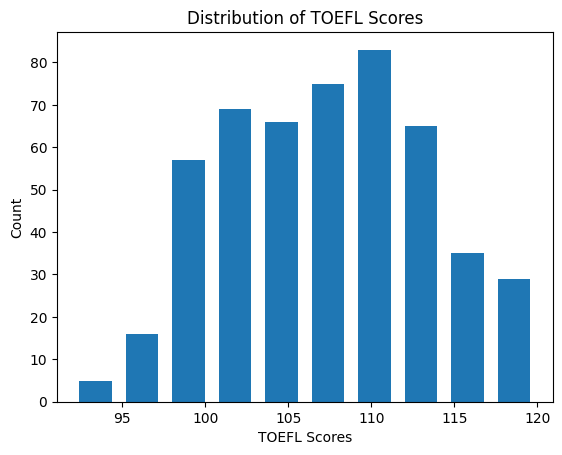

In [15]:
# Visualizing the feature TOEFL
fig = plt.hist(df['TOEFL'], rwidth=0.7)
plt.title('Distribution of TOEFL Scores')
plt.xlabel('TOEFL Scores')
plt.ylabel('Count')
plt.show()

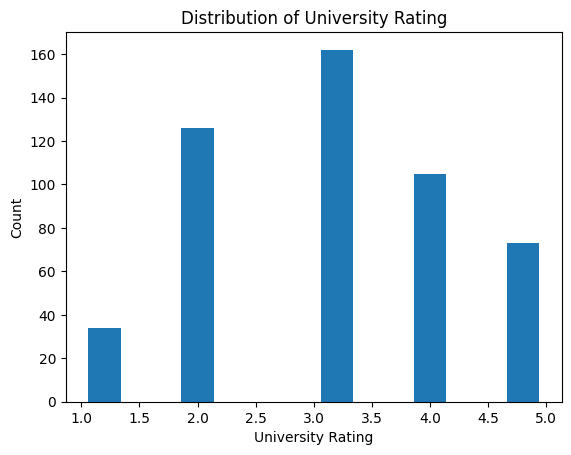

In [16]:
# Visualizing the feature University Rating
fig = plt.hist(df['University Rating'], rwidth=0.7)
plt.title('Distribution of University Rating')
plt.xlabel('University Rating')
plt.ylabel('Count')
plt.show()


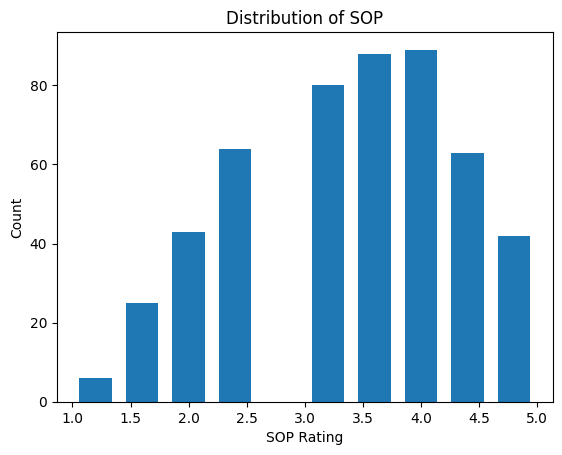

In [17]:
# Visualizing the feature SOP
fig = plt.hist(df['SOP'], rwidth=0.7)
plt.title('Distribution of SOP')
plt.xlabel('SOP Rating')
plt.ylabel('Count')
plt.show()

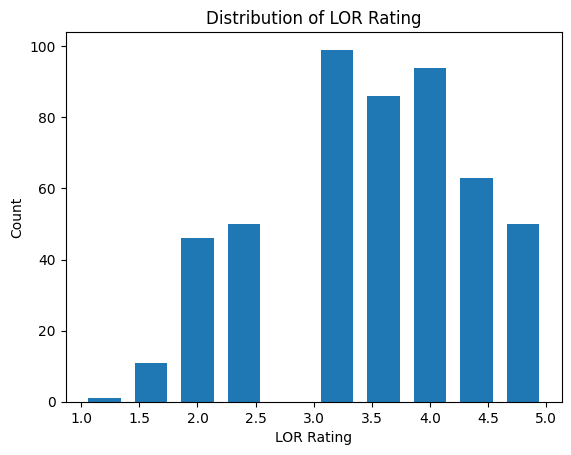

In [18]:
# Visualizing the feature LOR
fig = plt.hist(df['LOR'], rwidth=0.7)
plt.title('Distribution of LOR Rating')
plt.xlabel('LOR Rating')
plt.ylabel('Count')
plt.show()


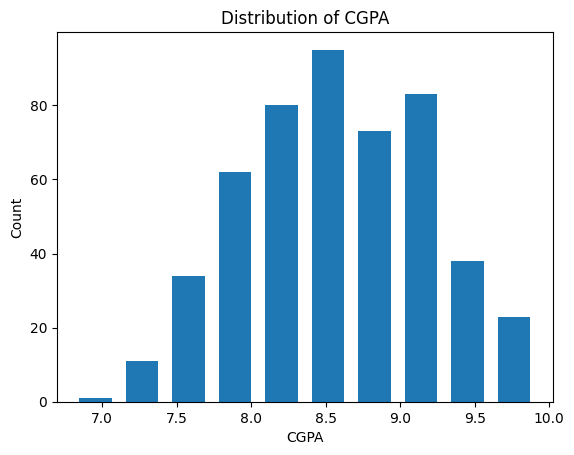

In [19]:
# Visualizing the feature CGPA
fig = plt.hist(df['CGPA'], rwidth=0.7)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()


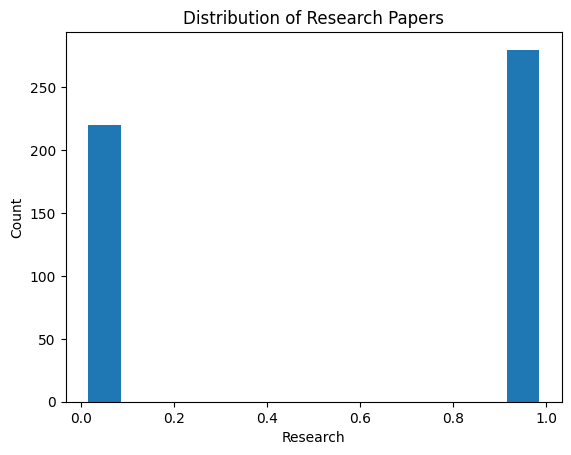

In [20]:
# Visualizing the feature Research Papers
fig = plt.hist(df['Research'], rwidth=0.7)
plt.title('Distribution of Research Papers')
plt.xlabel('Research')
plt.ylabel('Count')
plt.show()

Data Cleaning

In [21]:
# Removing the serial no. column
df.drop('Serial No.', axis='columns', inplace=True)
df.head()


,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [22]:
"""
Replacing the 0 values from ['GRE','TOEFL','University Rating','SOP','LOR','CGPA'] by NaN
because 0 is not a valid score
"""
df_copy = df.copy(deep=True)
df_copy[['GRE','TOEFL','University Rating','SOP','LOR','CGPA']] = df_copy[['GRE','TOEFL','University Rating','SOP','LOR','CGPA']].replace(0, np.nan)
df_copy.isnull().sum()

,0
GRE,0
TOEFL,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Probability,0


Model Building

In [23]:
# Splitting the dataset in features and label
X = df_copy.drop('Probability', axis='columns')
y = df_copy['Probability']


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


In [25]:
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {
                'positive': [True,False]
            }
        },

        'lasso': {
            'model': Lasso(),
            'parameters': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },

        'svr': {
            'model': SVR(),
            'parameters': {
                'gamma': ['auto','scale']
            }
        },


        'knn': {
            'model': KNeighborsRegressor(algorithm='auto'),
            'parameters': {
                'n_neighbors': [2,5,10,20]
            }
        }
    }

    scores = []
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=5, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })

    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X, y)

,model,best_parameters,score
0,linear_regression,{'positive': True},0.811461
1,lasso,"{'alpha': 1, 'selection': 'random'}",0.215088
2,svr,{'gamma': 'scale'},0.654099
3,knn,{'n_neighbors': 20},0.723012


Since the Linear Regression algorithm has the highest accuracy, the model selected for this problem is Linear Regression.

In [26]:
# Using cross_val_score for gaining highest accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(positive=True), X, y, cv=5)
print('Highest Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Highest Accuracy : 81%


In [27]:
# Splitting the dataset into train and test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
print(len(X_train), len(X_test))

400 100


In [28]:
# Creating Linear Regression Model
model = LinearRegression(positive=True)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8217070526314056

Predicting the values using our trained model

In [29]:
# Prediction 1
# Input in the form : GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research
print('Chance of getting into UCLA is {}%'.format(round(model.predict([[337, 118, 4, 4.5, 4.5, 9.65, 0]])[0]*100, 3)))

Chance of getting into UCLA is 92.856%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
# Prediction 2
# Input in the form : GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research
print('Chance of getting into UCLA is {}%'.format(round(model.predict([[320, 113, 2, 2.0, 2.5, 8.64, 1]])[0]*100, 3)))

Chance of getting into UCLA is 73.583%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Enhanced features shape: (500, 12)
New features: GRE_TOEFL, GRE_CGPA, GRE_sq, CGPA_sq, Combined_Rating
Enhanced Linear Regression R² score: 0.8217
Test RMSE: 0.0540
Test Accuracy: 91.43%


<ipython-input-31-18efb9cb6897>:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


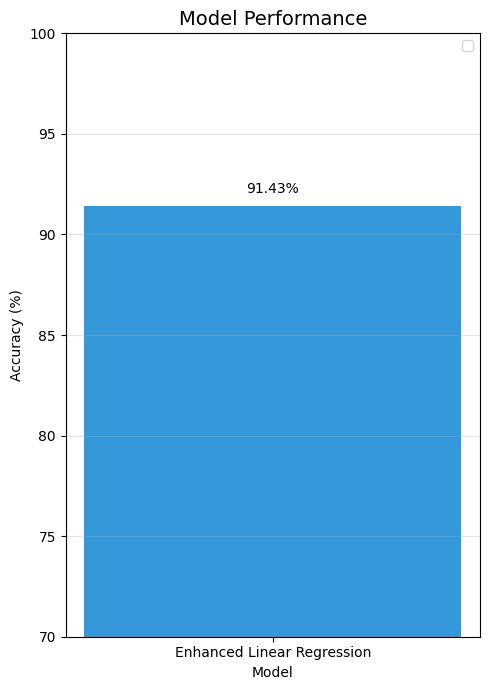

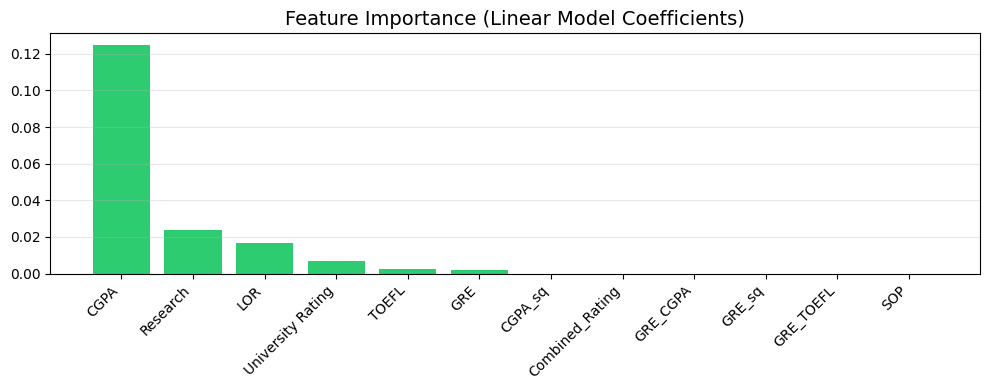

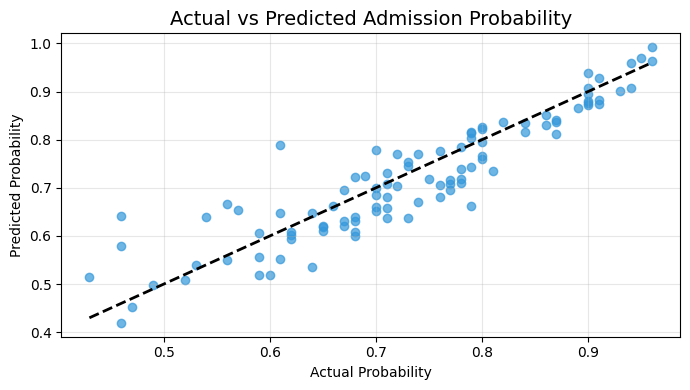


Example Predictions
Chance of getting into UCLA (Profile 1): 92.86%
Chance of getting into UCLA (Profile 2): 73.58%

FINAL MODEL SUMMARY
Enhanced Linear Regression R² Score: 0.8217
Test Accuracy: 91.43%


In [31]:
# ==========================================================
# Graduate Admission Prediction - Enhanced Linear Regression
# ==========================================================

# 1. Import Required Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 2. Feature Engineering
# We add a few meaningful interaction and squared features to help the linear model capture more complex relationships,
# but we avoid full polynomial expansion to keep the model simple, interpretable, and less prone to overfitting.
X_enhanced = X.copy()
X_enhanced['GRE_TOEFL'] = X_enhanced['GRE'] * X_enhanced['TOEFL'] / 1000  # Interaction, scaled
X_enhanced['GRE_CGPA'] = X_enhanced['GRE'] * X_enhanced['CGPA'] / 100     # Interaction, scaled
X_enhanced['GRE_sq'] = X_enhanced['GRE'] ** 2 / 1000                      # Squared, scaled
X_enhanced['CGPA_sq'] = X_enhanced['CGPA'] ** 2                           # Squared
X_enhanced['Combined_Rating'] = (X_enhanced['University Rating'] + X_enhanced['SOP'] + X_enhanced['LOR']) / 3  # Mean rating

print(f"Enhanced features shape: {X_enhanced.shape}")
print("New features: GRE_TOEFL, GRE_CGPA, GRE_sq, CGPA_sq, Combined_Rating")

# 3. Split Data into Train and Test Sets
X_train_enhanced, X_test_enhanced, y_train, y_test = train_test_split(
    X_enhanced, y, test_size=0.20, random_state=5
)

# 4. Train the Enhanced Linear Regression Model
enhanced_lr = LinearRegression(positive=True)
enhanced_lr.fit(X_train_enhanced, y_train)

# 5. Evaluate Model Performance
y_pred = enhanced_lr.predict(X_test_enhanced)
r2_score = enhanced_lr.score(X_test_enhanced, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
accuracy = 100 * (1 - rmse / (y.max() - y.min()))  # Accuracy as 1 - normalized RMSE

print(f"Enhanced Linear Regression R² score: {r2_score:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test Accuracy: {accuracy:.2f}%")

# 6. Visualization Functions
def visualize_model_performance():
    # Bar plot for accuracy
    plt.figure(figsize=(5, 7))
    plt.bar(['Enhanced Linear Regression'], [accuracy], color='#3498db')
    plt.text(0, accuracy + 0.5, f'{accuracy:.2f}%', ha='center', va='bottom')
    plt.ylim(70, 100)
    plt.title('Model Performance', fontsize=14)
    plt.ylabel('Accuracy (%)')
    plt.xlabel('Model')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Feature importance (absolute value of coefficients)
    plt.figure(figsize=(10, 4))
    feature_names = list(X_enhanced.columns)
    coefficients = enhanced_lr.coef_
    importance = np.abs(coefficients)
    indices = np.argsort(importance)[::-1]
    plt.title('Feature Importance (Linear Model Coefficients)', fontsize=14)
    plt.bar(range(len(feature_names)), importance[indices], color='#2ecc71', align='center')
    plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y', alpha=0.3)
    plt.show()

    # Actual vs Predicted scatter plot
    plt.figure(figsize=(7, 4))
    plt.scatter(y_test, y_pred, alpha=0.7, color='#3498db')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Probability')
    plt.ylabel('Predicted Probability')
    plt.title('Actual vs Predicted Admission Probability', fontsize=14)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

visualize_model_performance()

# 7. Prediction Function for New Data
def predict_admission_chance(gre, toefl, univ_rating, sop, lor, cgpa, research):
    """
    Predicts the chance of admission using the enhanced linear regression model.
    Input: All features as numbers (same order as training)
    Output: Probability in percent (rounded to 2 decimals)
    """
    input_data = pd.DataFrame({
        'GRE': [gre],
        'TOEFL': [toefl],
        'University Rating': [univ_rating],
        'SOP': [sop],
        'LOR': [lor],
        'CGPA': [cgpa],
        'Research': [research]
    })
    # Add engineered features
    input_enhanced = input_data.copy()
    input_enhanced['GRE_TOEFL'] = input_enhanced['GRE'] * input_enhanced['TOEFL'] / 1000
    input_enhanced['GRE_CGPA'] = input_enhanced['GRE'] * input_enhanced['CGPA'] / 100
    input_enhanced['GRE_sq'] = input_enhanced['GRE'] ** 2 / 1000
    input_enhanced['CGPA_sq'] = input_enhanced['CGPA'] ** 2
    input_enhanced['Combined_Rating'] = (input_enhanced['University Rating'] + input_enhanced['SOP'] + input_enhanced['LOR']) / 3
    prediction = enhanced_lr.predict(input_enhanced)[0] * 100
    return round(prediction, 2)

# 8. Example Predictions
print("\n" + "="*60)
print("Example Predictions")
print("="*60)
print(f"Chance of getting into UCLA (Profile 1): {predict_admission_chance(337, 118, 4, 4.5, 4.5, 9.65, 0)}%")
print(f"Chance of getting into UCLA (Profile 2): {predict_admission_chance(320, 113, 2, 2.0, 2.5, 8.64, 1)}%")

# 9. Final Model Summary
print("\n" + "="*60)
print("FINAL MODEL SUMMARY")
print("="*60)
print(f"Enhanced Linear Regression R² Score: {r2_score:.4f}")
print(f"Test Accuracy: {accuracy:.2f}%")
print("="*60)

In [32]:
import joblib

# Save the trained model
joblib.dump(model, 'admission_model.pkl')

['admission_model.pkl']

In [33]:
!pip install pyngrok flask flask-cors joblib --quiet

In [34]:
from pyngrok import ngrok

ngrok.set_auth_token("2wkR1ZhCdtUCfrMGNnH6KEL5YYS_6DpjsAHZU6izVWtJdt65t")
from flask import Flask, request, jsonify
from flask_cors import CORS
import joblib

# Load your model
model = joblib.load('admission_model.pkl')

app = Flask(__name__)
CORS(app)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    features = [
        data['gre'],
        data['toefl'],
        data['university_rating'],
        data['sop'],
        data['lor'],
        data['cgpa'],
        data['research']
    ]
    prediction = model.predict([features])[0]
    return jsonify({'probability': float(prediction)})

# Open a ngrok tunnel to the Flask app
public_url = ngrok.connect(5000)
print(' * ngrok tunnel:', public_url)

app.run()

 * ngrok tunnel: NgrokTunnel: "https://611a-34-16-133-147.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [01/Jun/2025 09:39:28] "OPTIONS /predict HTTP/1.1" 200 -
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [01/Jun/2025 09:39:29] "POST /predict HTTP/1.1" 200 -
